# Hands-On KNN and Perceptron
***

In this notebook we'll investigate Scikit-Learn's implementation of K-Nearest Neighbors and the Perceptron classifier.  In addition, we'll look at how we can evaluate the performance our classifiers with a so-called confusion matrix.  

**Note**: There are some helper functions at the bottom of this notebook.  Scroll down and execute those cells before continuing. 

**Acknowledgment**: Chris Ketelsen

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### Part 1: Classifying Iris Species 
***

In this problem we'll use K-Nearest Neighbors to classify species of irises based on certain physical characteristics.  The so-called [_iris dataset_](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a popular dataset for prototyping classification algorithms. We can load the iris dataset from Scikit-Learn directly. The dataset contains four features: sepal length, sepal width, pedal length, and pedal width and three classes defined by the species of iris: setosa, versicolor, and virginica. We'll only use the sepal dimensions so that we can easily visualize the data. 

Execute the following code cell to load training and validation sets for the iris data set and then plot the data.    

classes =  ['setosa' 'versicolor' 'virginica']


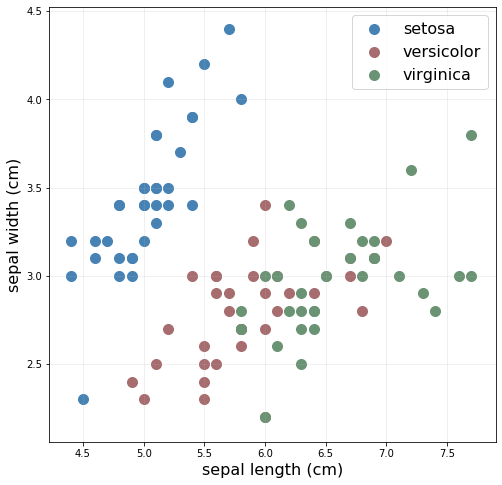

In [3]:
X_train, y_train, X_valid, y_valid, target_names = load_iris()
print("classes = ", target_names)
plot_iris(X_train, y_train)

**Part A**: How many examples are in the training set?  How many examples belong to each of the three classes? 

In [ ]:
# TODO 

**Part B**: Next we'll train a KNN classifier to predict iris species based on the sepal measurement features.  The KNN classifier in Scikit-Learn is called [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).  Go now and check out the documentation. Define and fit a model with $K=15$ to the training set.  The `plot_knn_boundary` function will then plot the KNN decision boundary against the data. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = # TODO 
plot_knn_boundary(X_train, y_train, knn)

**Part C**: Play with the value of $K$ above.  How does the character of the decision boundary change with $K$? 

**Part D**: Until this point we've been plotting the KNN decision boundary against the training data, but really we're interested in how our model does on the validation set.  The following code will train a 1-NN classifier and plot the decision boundary against the validation data. How many points in total are misclassified?  Which species get confused with each other the most? 

In [ ]:
knn = KNeighborsClassifier(1).fit(X_train, y_train)
plot_knn_boundary(X_valid, y_valid, knn)

**Part E**: Counting misclassified points becomes much more difficult when our data sets are very large.  One convenient method for analyzing misclassification is by constructing the so-called confusion matrix. The confusion matrix is `(# classes)` $\times$ `(# classes)` matrix such that the entry $C_{ij}$ is the number of examples with _true_ label $i$ predicted to have label $j$. 

We can compute the confusion matrix using Scikit-Learn's [confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function. Read the documentation and then fill in the missing code to compute the confusion matrix for the validation data and the 1-NN classifier.  Do the entries in $C$ agree (roughly) with the visual counts you made above? 

In [ ]:
from sklearn.metrics import confusion_matrix
y_hat_valid = # TODO 
C = # TODO 
print(C)

**Part F**: Vary the number of nearest neighbors used in KNN above and recompute the confusion matrix.  Describe your results. Does there seem to be a particular setting that works better than the others for the validation data ?

**Part G**: Fill in the code below to compute the error rate on the validation data from the confusion matrix. 

In [ ]:
def error_rate(C):
    # TODO 
    return 0 

print("error rate = {}".format(error_rate(C))

### Part 2: The Perceptron on Simulated Data
***

In this problem you'll fit a perceptron model to linearly separable data as well as mildly not-linearly separable data. Execute the following cell to load and plot the data. 

In [ ]:
X, y = poly_data(100, sep=0.05, rot=np.pi/6)
fig, ax = data_plot(scatter=[(X, y)])

**Part A**: Our first task will be to fit a perceptron model to the data using Scikit-Learn's [Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) classifier.  Go now and look at the documentation. Then fit a model using only a single pass of the Perceptron Algorithm. What values for the weights and the bias did the algorithm find? 

In [ ]:
from sklearn.linear_model import Perceptron
perc = Perceptron(max_iter=1, alpha=0.0, shuffle=False)
perc.fit(X, y)

**Part B**: Plot the resulting perceptron decision boundary by filling in the below. Was the perceptron able to perfectly fit the training data with just a single epoch? 

In [ ]:
fig, ax = data_plot(scatter=[(X, y)])
xplot = np.linspace(-1.5, 1.5, 20)
w, b = perc.coef_[0], perc.intercept_[0]
yplot = # TODO 
ax.plot(xplot, yplot, lw=3, color="black")

**Part C**: Next we're going to augment the data set so that it's no longer linearly separable.  Execute the following cell to see the result. 

In [ ]:
X, y = poly_data(100, sep=0.05, rot=np.pi/6)
X_new = np.concatenate((X, np.array([[0.5, 0.5]])))
y_new = np.concatenate((y, np.array([-1])))
fig, ax = data_plot(scatter=[(X_new, y_new)])

**Part D**: Fit a new perceptron classifier to the data using the same parameters as before.  It's very important that you keep the `shuffle=False` flag because we want the new blue point to be the last point encountered in the epoch.  Plot the new decision boundary.  How badly did the new rogue point disrupt the classifier? 

In [ ]:
new_perc = Perceptron(max_iter=1, alpha=0.0, shuffle=False)
new_perc.fit(X_new, y_new)
xplot = np.linspace(-1.5, 1.5, 20)
w, b = new_perc.coef_[0], new_perc.intercept_[0]
yplot = # TODO 
fig, ax = data_plot(scatter=[(X_new, y_new)])
ax.plot(xplot, yplot, lw=3, color="black")

**Part E**: Adjust some of the parameters and settings above to see if you can obtain a better decision boundary.  Things that might be helpful to change are the number of epochs and whether the data is shuffled between each epoch. 

<br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br>

### Helper Functions
***

In [2]:
# ----------------------------------------------------
# Functions for KNN and iris dataset
# ----------------------------------------------------

def load_iris(standardize=False, random_state=1234): 
    
    from sklearn import datasets
    from sklearn.preprocessing import StandardScaler 
    
    np.random.seed(random_state)
    
    # Load the data and grab first two features 
    iris = datasets.load_iris()
    X, y = iris.data[:,:2], iris.target 
        
    # Randomly split into validation and training sets 
    ones = np.ones(50, dtype=int)
    valid_mask = np.full(50, False)
    valid_mask[np.random.choice(range(50), replace=False, size=16)] = True 
    train_mask = np.logical_not(valid_mask)
    X_train = np.concatenate((X[y==0][train_mask], X[y==1][train_mask], X[y==2][train_mask]))
    y_train = np.concatenate((0 * ones[train_mask], 1 * ones[train_mask], 2 * ones[train_mask]))
    X_valid = np.concatenate((X[y==0][valid_mask], X[y==1][valid_mask], X[y==2][valid_mask]))
    y_valid = np.concatenate((0 * ones[valid_mask], 1 * ones[valid_mask], 2 * ones[valid_mask]))
    
    # Standardize data if desired 
    if standardize: 
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_valid = scaler.transform(X_valid)
        
    return X_train, y_train, X_valid, y_valid, iris.target_names
    

def plot_iris(X, y):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    name_color_dict = {
        0: ("steelblue", "setosa"),
        1:("#a76c6e", "versicolor"),
        2:("#6a9373", "virginica")
    }
    for k in [0,1,2]:
        ax.scatter(X[y==k, 0], X[y==k, 1], color=name_color_dict[k][0],
                   s=100, label=name_color_dict[k][1])
    ax.grid(alpha=0.25)
    ax.legend(loc="upper right", fontsize=16)
    ax.set_xlabel("sepal length (cm)", fontsize=16)
    ax.set_ylabel("sepal width (cm)", fontsize=16)
    
def plot_knn_boundary(X, y, model):
    
    from matplotlib import colors
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    
    name_color_dict = {
        0: ("steelblue", "setosa"),
        1:("#a76c6e", "versicolor"),
        2:("#6a9373", "virginica")
    }
    for k in [0,1,2]:
        ax.scatter(X[y==k, 0], X[y==k, 1], color=name_color_dict[k][0],
                   s=100, label=name_color_dict[k][1], edgecolors="white", zorder=2)
    
    # Plot the decision boundary. 
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.025), np.arange(y_min, y_max, 0.025))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Define custom colormap 
    cmap = colors.ListedColormap(['steelblue', '#a76c6e', '#6a9373'])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap, alpha=0.5, zorder=1)

    ax.legend(loc="upper right", fontsize=16)
    ax.set_xlabel("sepal length (cm)", fontsize=16)
    ax.set_ylabel("sepal width (cm)", fontsize=16)

# ----------------------------------------------------
# Functions for Perceptron and Simulated Data 
# ----------------------------------------------------

def data_plot(scatter=[], models=[]):
    '''
    Function to plot the dam data 
    '''
    
    # colors for scatter plots and model plots 
    scolors = ["steelblue", "#a76c6e", "#6a9373", "orange"]
    mcolors = ["black", "gray"]
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
    
    # Loop over scatter data and make plots 
    for ii, (x, y) in enumerate(scatter):
        pos = x[y==1, :]
        neg = x[y==-1, :]
        ax.scatter(pos[:, 0], pos[:, 1], s=100, color=scolors[1], label="pos", zorder=2)
        ax.scatter(neg[:, 0], neg[:, 1], s=100, color=scolors[0], label="neg", zorder=2)
        
    # Loop over model data and make plots 
    for ii, (xplot, yplot, label) in enumerate(models):
        ax.plot(xplot, yplot, color=mcolors[ii], lw=3, label=label, zorder=1)
        
    # Set axis limits
    ax.set_xlim([-1.5,1.5])
    ax.set_ylim([-1.5,1.5])
        
    # Label all the things 
    ax.set_xlabel(r"$x_1$", fontsize=16)
    ax.set_ylabel(r"$x_2$", fontsize=16)
    ax.set_title("Data Plot", fontsize=20)
    ax.grid(alpha=0.25)
    ax.legend(loc="upper left", fontsize=12)
    
    return fig, ax 

def poly_data(n, mag=0, sep=0, rot=0.0, random_state=1235):
    np.random.seed(random_state)
    x1 = np.random.uniform(-1, 1, n)
    x2 = np.random.uniform(-1, 1, n)
    X = np.column_stack((x1, x2))
    y = np.array([1 if mag * (x1i-1) * (x1i+1) * x1i < x2i else -1
                  for x1i, x2i in zip(x1, x2)])
    X[y==1, 1] += sep 
    X[y==-1, 1] -= sep 
    s = np.sin(rot)
    c = np.cos(rot)
    Q = np.array([[c,s], [-s, c]])
    X = np.dot(X, Q)
    shuffle = np.random.choice(range(X.shape[0]), replace=False, size=X.shape[0])
    X, y = X[shuffle, :], y[shuffle]
    return X, y
    